In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [108]:
# Step 1: Load the dataset
gdp_data = pd.read_csv('gdp.csv')
orig_gdp_data = copy.deepcopy(gdp_data)
gdp_data.shape

(10855, 20)

In [109]:
# GDP per capita (current US$)
# GDP growth (annual %)
gdp_data['Series Name'].unique()

array(['Population, total', 'Population growth (annual %)',
       'Surface area (sq. km)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'GNI, Atlas method (current US$)',
       'GNI per capita, Atlas method (current US$)',
       'GNI, PPP (current international $)',
       'GNI per capita, PPP (current international $)',
       'Income share held by lowest 20%',
       'Life expectancy at birth, total (years)',
       'Fertility rate, total (births per woman)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Contraceptive prevalence, any method (% of married women ages 15-49)',
       'Births attended by skilled health staff (% of total)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Primary completion rate, total (% of relevant age group)',
       'Sc

In [110]:
gdp_data = gdp_data[gdp_data['Series Name'] == 'GDP (current US$)']

In [111]:
gdp_data = gdp_data[~gdp_data['Country Code'].isna()] # Dropping the invalid countries
gdp_data.drop(columns=['Country Code'], inplace=True) # Dropping country code column as we already have country names.
gdp_data.drop(columns=['Series Name', 'Series Code'], inplace=True) # Dropping the series name and series code as they are constant
gdp_data.set_index('Country Name', inplace=True) # Setting the country code as index column

In [112]:
gdp_data.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
Country Name,,,,,,,,,,,,,,,,
Afghanistan,3521418059.92345,2813571753.87253,3825701438.99963,4520946818.54581,5224896718.67782,6203256538.70967,6971758282.29351,9747886187.39393,10109297047.5432,12416152732.0567,15856668555.8336,17805098206.3141,19907329777.5872,20146416757.5987,20497128555.6972,19134221644.7325
Albania,3480355258.04122,3922100793.5403,4348068242.19512,5611496257.14231,7184685781.51876,8052077248.14638,8896075004.63516,10677324852.8822,12881352893.6855,12044205549.6571,11926926615.8015,12890760315.146,12319834195.331,12776224496.9718,13228147516.1168,11386853113.0189
Algeria,54790398570.3282,59413400923.6364,61516103406.1688,73482264190.9245,91913680985.1708,107046618669.707,123084258693.01,142482739809.849,180383848331.135,150317292079.359,177785053939.531,218331946925.304,227143746075.934,229701430292.157,238942664192.59,187493855609.345
American Samoa,..,..,512000000,524000000,509000000,500000000,493000000,518000000,560000000,675000000,573000000,570000000,640000000,638000000,643000000,673000000
Andorra,1432606188.69324,1548265808.05802,1764279824.29752,2366941808.94404,2900245324.49221,3161084091.11674,3459337986.44948,3957625367.21959,4102319399.02343,3688976340.7549,3449925738.86069,3629133574.27783,3188652765.36184,3193512950.02419,3271685596.66321,2789881258.50362


In [113]:
gdp_data.columns

Index(['2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'],
      dtype='object')

In [127]:
for col in gdp_data.columns:
    gdp_data[col] = gdp_data[col].astype(str).fillna('0')
    gdp_data[col] = gdp_data[col].apply(lambda x: x.replace('', '0'))
    gdp_data[col] = gdp_data[col].apply(lambda x: x.replace('0-', ''))
    gdp_data[col] = gdp_data[col].apply(lambda x: x.replace('..', '.'))
    gdp_data[col] = gdp_data[col].apply(lambda x: x.replace('0.0.0', '0'))
    gdp_data[col] = gdp_data[col].apply(lambda x: x.split(".")[0] + "." + x.split(".")[1] if "." in x else x)
    gdp_data[col] = gdp_data[col].astype('float64').astype('int')

In [128]:
#gdp_data.fillna(gdp_data.mean(axis=1), inplace=True)
gdp_data = gdp_data.replace([np.inf, -np.inf], np.nan)
gdp_data.fillna(0, inplace=True)
#gdp_data = gdp_data.round(4)
#gdp_data.fillna(0, inplace=True)

In [129]:
gdp_data.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
Country Name,,,,,,,,,,,,,,,,
Afghanistan,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
Albania,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
Algeria,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
American Samoa,0,0,501020000000000000,502040000000000000,500090000000000000,500000000000000000,409030000000000000,501080000000000000,506000000000000000,607050000000000000,507030000000000000,507000000000000000,604000000000000000,603080000000000000,604030000000000000,607030000000000000
Andorra,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808


In [130]:
#gdp_data = np.round(gdp_data, 0)
for col in gdp_data.columns:
    gdp_data[col] = gdp_data[col].apply(lambda x : int(x))
gdp_data.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
Country Name,,,,,,,,,,,,,,,,
Afghanistan,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
Albania,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
Algeria,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
American Samoa,0,0,501020000000000000,502040000000000000,500090000000000000,500000000000000000,409030000000000000,501080000000000000,506000000000000000,607050000000000000,507030000000000000,507000000000000000,604000000000000000,603080000000000000,604030000000000000,607030000000000000
Andorra,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808


In [131]:
gdp_data.dtypes

,0
2000 [YR2000],int64
2001 [YR2001],int64
2002 [YR2002],int64
2003 [YR2003],int64
2004 [YR2004],int64
2005 [YR2005],int64
2006 [YR2006],int64
2007 [YR2007],int64
2008 [YR2008],int64
2009 [YR2009],int64


In [132]:
gdp_data[gdp_data.index.duplicated() == True]

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
Country Name,,,,,,,,,,,,,,,,


In [133]:
gdp_data.shape

(217, 16)

In [134]:
#pd.set_option('display.float_format', lambda x: '%.0f' % x)
#gdp_data.head()

In [135]:
gdp_data.mean(axis = 1).reset_index().sort_values(by = 0, ascending = False).reset_index(drop = True)

,Country Name,0
0,Turks and Caicos Islands,579171055856743936
1,American Samoa,466155000000000000
2,St. Martin (French part),88379481816350576
3,Grenada,60642757744506008
4,St. Kitts and Nevis,34719002231317680
...,...,...
212,Hungary,-9223372036854775808
213,Iceland,-9223372036854775808
214,India,-9223372036854775808
215,Indonesia,-9223372036854775808


In [140]:
gdp_data.loc['Jordan']

,Jordan
2000 [YR2000],-9223372036854775808
2001 [YR2001],-9223372036854775808
2002 [YR2002],-9223372036854775808
2003 [YR2003],-9223372036854775808
2004 [YR2004],-9223372036854775808
2005 [YR2005],-9223372036854775808
2006 [YR2006],-9223372036854775808
2007 [YR2007],-9223372036854775808
2008 [YR2008],-9223372036854775808
2009 [YR2009],-9223372036854775808


In [139]:
gdp_data.loc['Nicaragua']#-9223372036854775808

,Nicaragua
2000 [YR2000],-9223372036854775808
2001 [YR2001],-9223372036854775808
2002 [YR2002],-9223372036854775808
2003 [YR2003],-9223372036854775808
2004 [YR2004],-9223372036854775808
2005 [YR2005],-9223372036854775808
2006 [YR2006],-9223372036854775808
2007 [YR2007],-9223372036854775808
2008 [YR2008],-9223372036854775808
2009 [YR2009],-9223372036854775808


In [138]:
temp_df = gdp_data.sum(axis = 1).reset_index().sort_values(by = 0, ascending = False).reset_index(drop = True)
temp_df = temp_df.rename(columns = {0: 'Total'})
temp_df = temp_df.set_index('Country Name')
temp_df = temp_df[np.round(temp_df['Total']) <= 0]
list(temp_df.index)

['Nicaragua',
 'Mozambique',
 'Paraguay',
 'Papua New Guinea',
 'Panama',
 'Myanmar',
 'Pakistan',
 'Oman',
 'Namibia',
 'Nepal',
 'Norway',
 'Nigeria',
 'Netherlands',
 'Niger',
 'New Caledonia',
 'New Zealand',
 'Afghanistan',
 'Morocco',
 'Philippines',
 'Madagascar',
 'Lao PDR',
 'Albania',
 'Lebanon',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macao SAR, China',
 'North Macedonia',
 'Malawi',
 'Montenegro',
 'Malaysia',
 'Mali',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Monaco',
 'Mongolia',
 'Peru',
 'Romania',
 'Poland',
 'Ukraine',
 'Tajikistan',
 'Tanzania',
 'Thailand',
 'Togo',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkiye',
 'Turkmenistan',
 'Uganda',
 'United Arab Emirates',
 'Portugal',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Viet Nam',
 'Virgin Islands (U.S.)',
 'West Bank and Gaza',
 'Yemen, Rep.',
 'Zambia',
 'Syrian Arab Republic',
 'Switzerland',
 'Sweden',
 'Eswatini',
 'Puerto Rico',
 'Qatar',
 'Kuwait

In [75]:
gdp_data = gdp_data.drop(list(temp_df.index)) # Excluding the countries where we do not have data.

In [107]:
threshold = 0
col_list_abv_threshold = []
for col in gdp_data.columns:
    if gdp_data[col].gt(threshold).all():
        col_list_abv_threshold.append(col)

#columns = gdp_data.columns[gdp_data.gt(threshold).all()]

print(col_list_abv_threshold)

[]


In [76]:
# Step 3: Standardize the data
scaler = StandardScaler()
gdp_scaled = scaler.fit_transform(gdp_data)

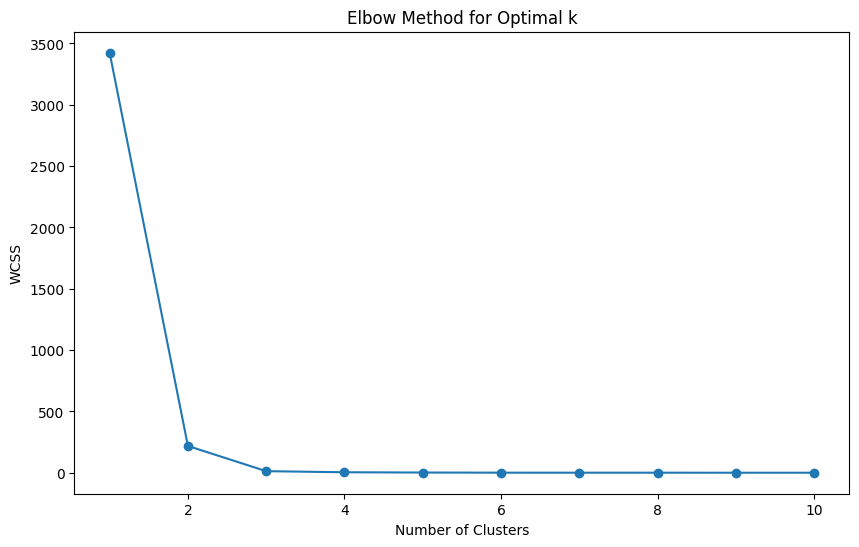

In [77]:
# Step 4: Determine the optimal number of clusters (Elbow Method)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(gdp_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [78]:
# Step 5: Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
gdp_data['cluster'] = kmeans.fit_predict(gdp_scaled)

In [79]:
gdp_data.groupby('cluster').mean()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
cluster,,,,,,,,,,,,,,,,
0,425643463290549256060928.0000,422806761141227539660800.0000,468596474476472047763456.0000,528853787852428594380800.0000,672875549696875548377088.0000,682921272643734263037952.0000,824333218330727227064320.0000,1056399319554025611853824.0000,1120447663337291403755520.0000,977423029527934673092608.0000,1164875574360218515013632.0000,1273570904620796800401408.0000,1272709518483079187922944.0000,1232630246188083985776640.0000,1277402540508014069153792.0000,1078000362174417440079872.0000
1,1000205000905020045957005312.0000,1000508010902090023406927872.0000,1000902090100079935675695104.0000,1010405060404999981501513728.0000,1020201070109059969731002368.0000,1030003090109069971937034240.0000,1030801050508029991688601600.0000,1040407040202080181995700224.0000,1040706090806019852825788416.0000,1040407080006070028698910720.0000,1050004080907010084867932160.0000,1050509090703019922937610240.0000,1060205030906999856871505920.0000,1060808000608029976112922624.0000,1070600080103080189990273024.0000,1080209050001089888046284800.0000
2,10201010303010605776240640.0000,10303090400000809187147776.0000,10407000505070605941342208.0000,10606000208000503953489920.0000,10905050304060706495922176.0000,20208050906010104748834816.0000,20705020101080604712370176.0000,30505000302070800760963072.0000,40509040303060705156792320.0000,50100010609010097759715328.0000,60008070109010700393250816.0000,70505010504050710136487936.0000,80503020108050314133766144.0000,90507000407010108332048384.0000,1000407050602040853650210816.0000,1010006010507020627506888704.0000


In [80]:
gdp_data.groupby('cluster').count() # Clustering is very skewed.

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
cluster,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [81]:
# Step 6: Visualize clusters
gdp_cluster_summary = gdp_data.groupby('cluster').mean()
gdp_cluster_summary
# Step 7: Save the clustered data
#gdp_filter.to_csv('clustered_gdp_data.csv')

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
cluster,,,,,,,,,,,,,,,,
0,425643463290549256060928.0000,422806761141227539660800.0000,468596474476472047763456.0000,528853787852428594380800.0000,672875549696875548377088.0000,682921272643734263037952.0000,824333218330727227064320.0000,1056399319554025611853824.0000,1120447663337291403755520.0000,977423029527934673092608.0000,1164875574360218515013632.0000,1273570904620796800401408.0000,1272709518483079187922944.0000,1232630246188083985776640.0000,1277402540508014069153792.0000,1078000362174417440079872.0000
1,1000205000905020045957005312.0000,1000508010902090023406927872.0000,1000902090100079935675695104.0000,1010405060404999981501513728.0000,1020201070109059969731002368.0000,1030003090109069971937034240.0000,1030801050508029991688601600.0000,1040407040202080181995700224.0000,1040706090806019852825788416.0000,1040407080006070028698910720.0000,1050004080907010084867932160.0000,1050509090703019922937610240.0000,1060205030906999856871505920.0000,1060808000608029976112922624.0000,1070600080103080189990273024.0000,1080209050001089888046284800.0000
2,10201010303010605776240640.0000,10303090400000809187147776.0000,10407000505070605941342208.0000,10606000208000503953489920.0000,10905050304060706495922176.0000,20208050906010104748834816.0000,20705020101080604712370176.0000,30505000302070800760963072.0000,40509040303060705156792320.0000,50100010609010097759715328.0000,60008070109010700393250816.0000,70505010504050710136487936.0000,80503020108050314133766144.0000,90507000407010108332048384.0000,1000407050602040853650210816.0000,1010006010507020627506888704.0000


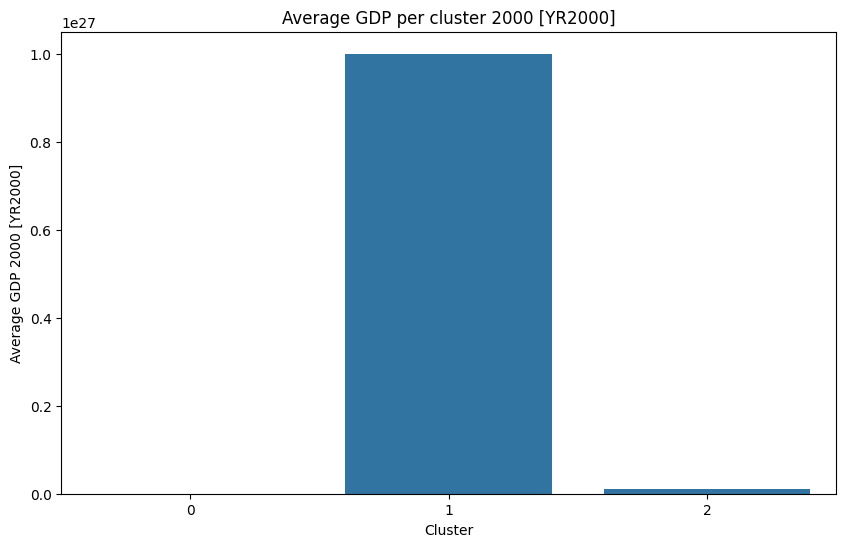

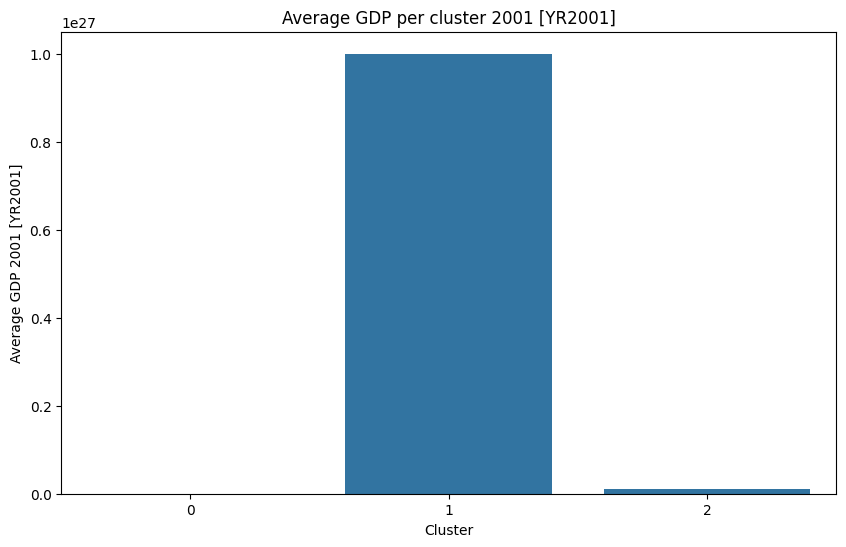

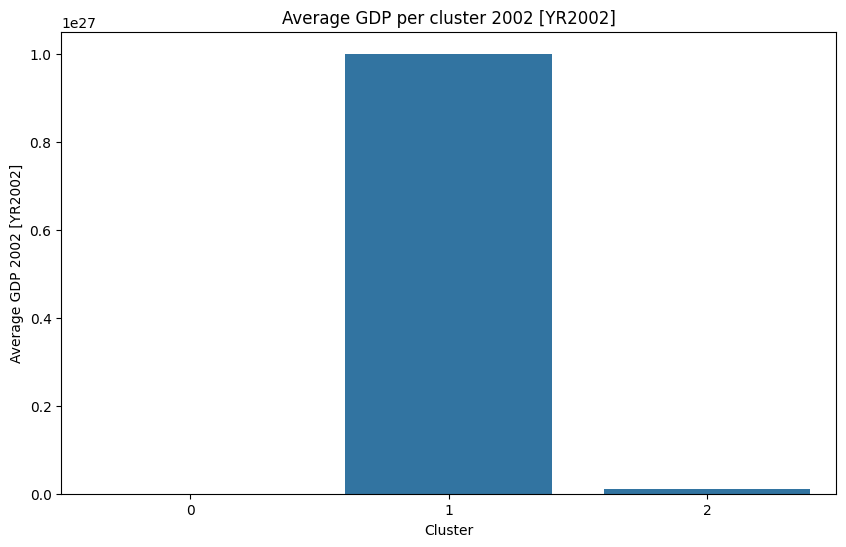

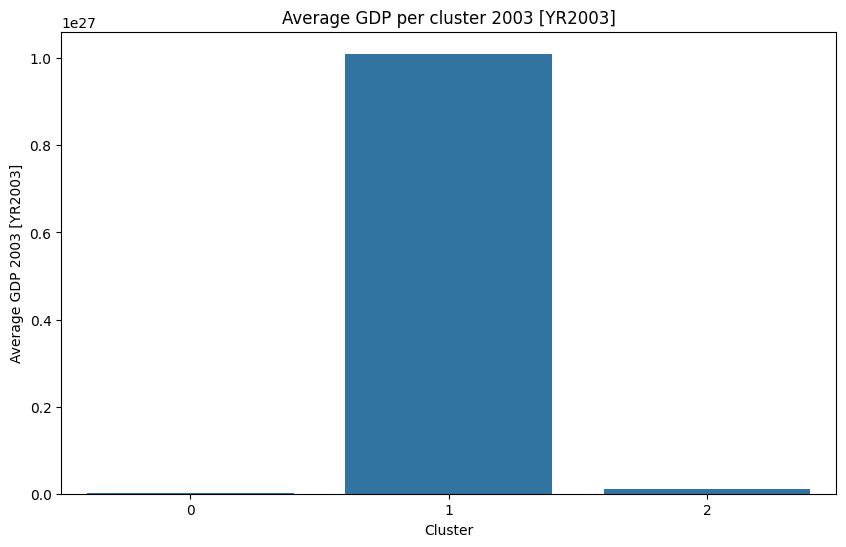

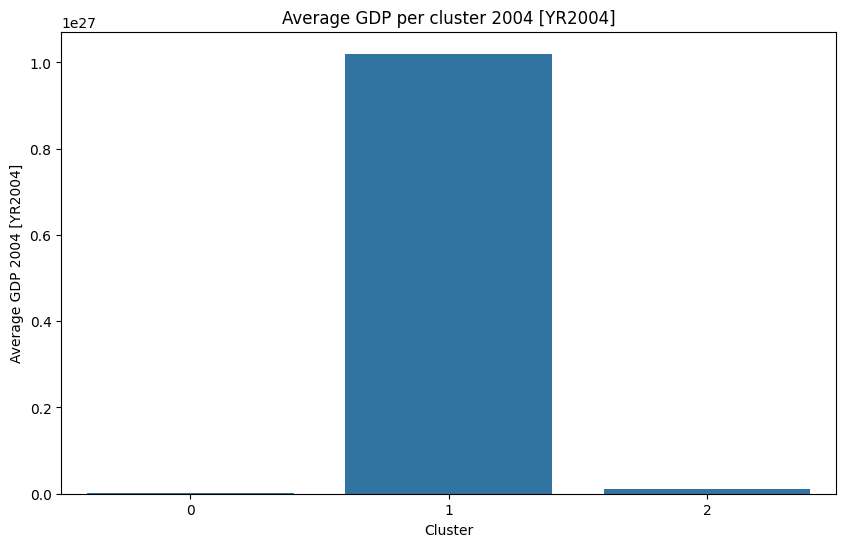

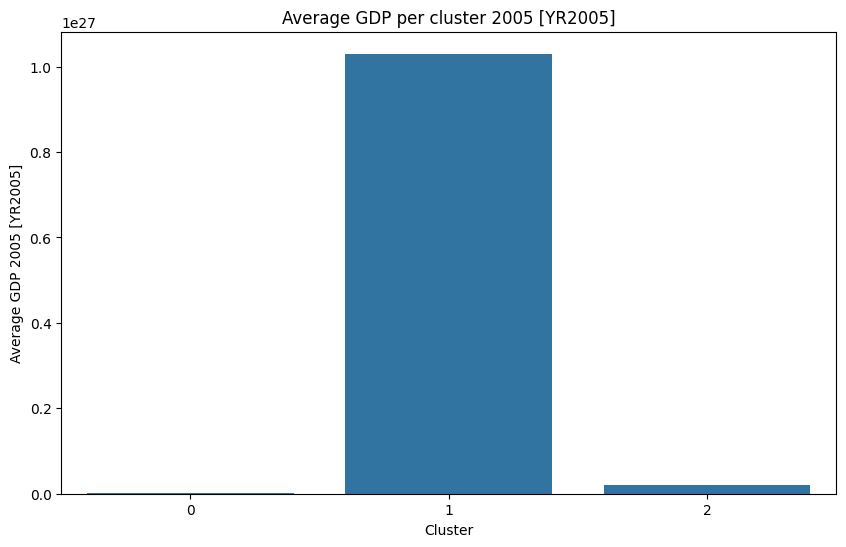

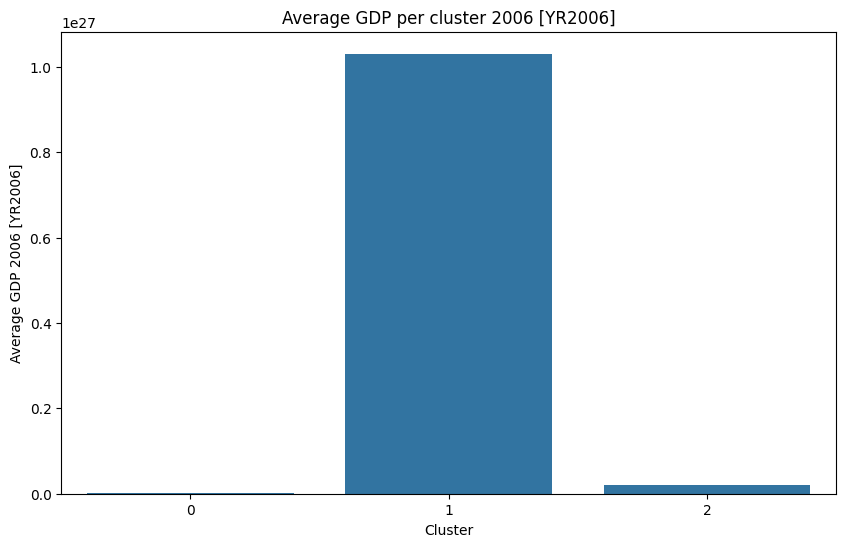

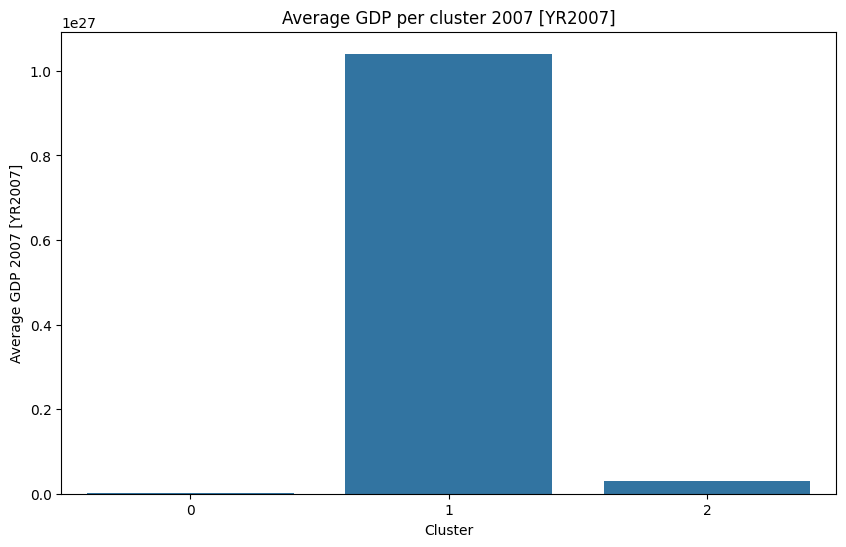

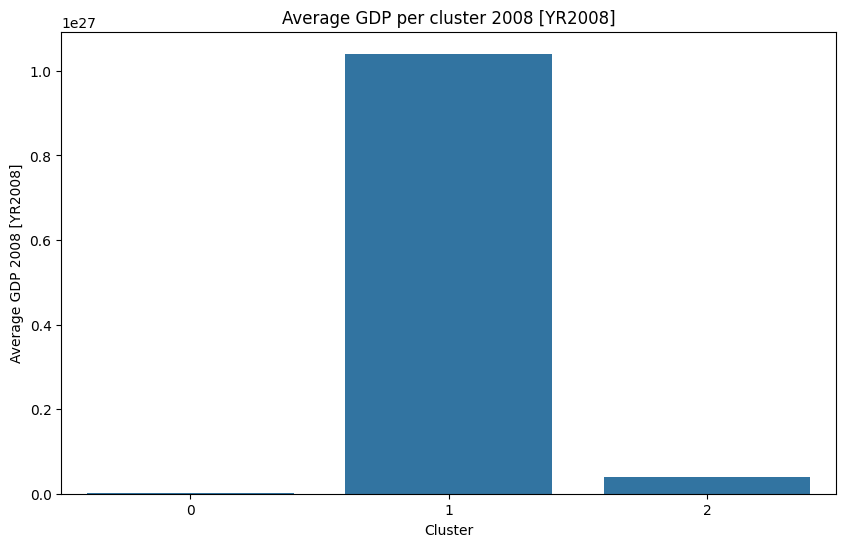

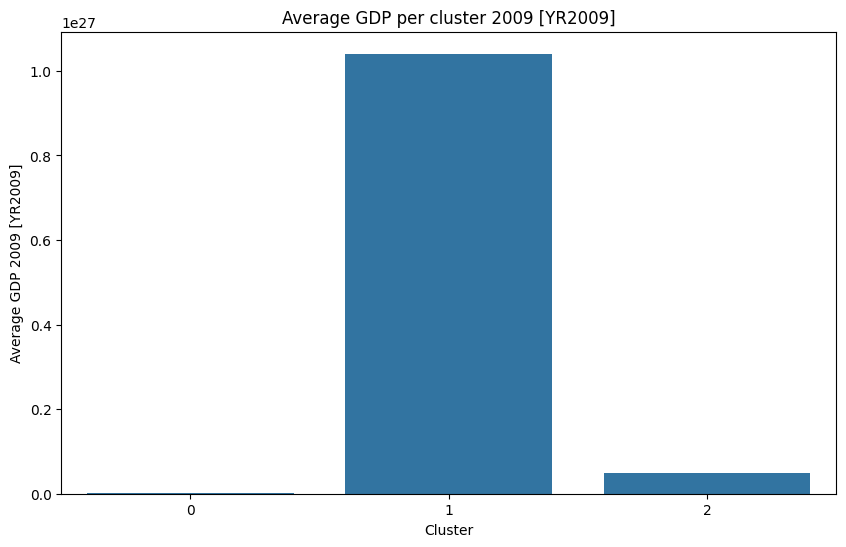

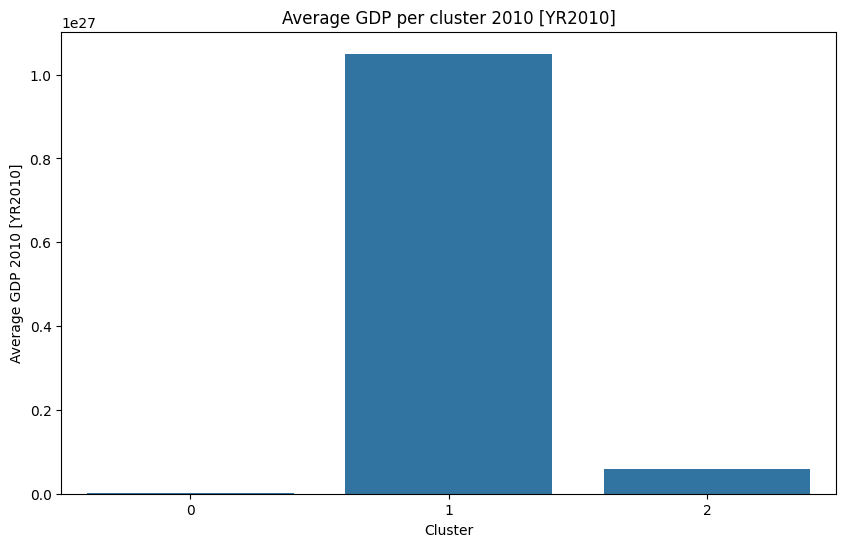

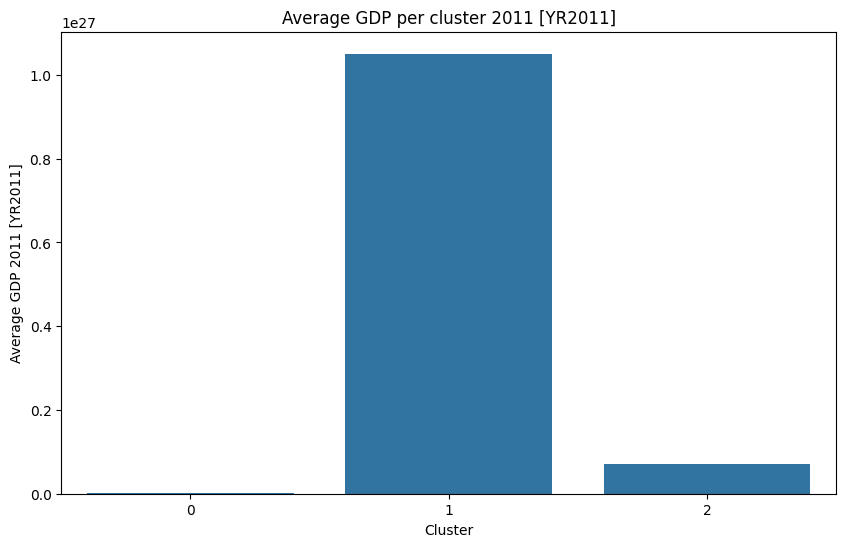

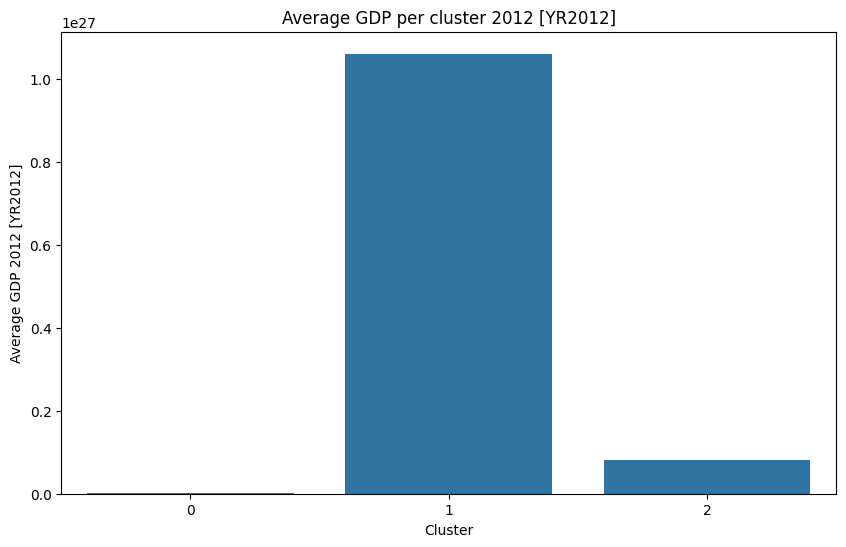

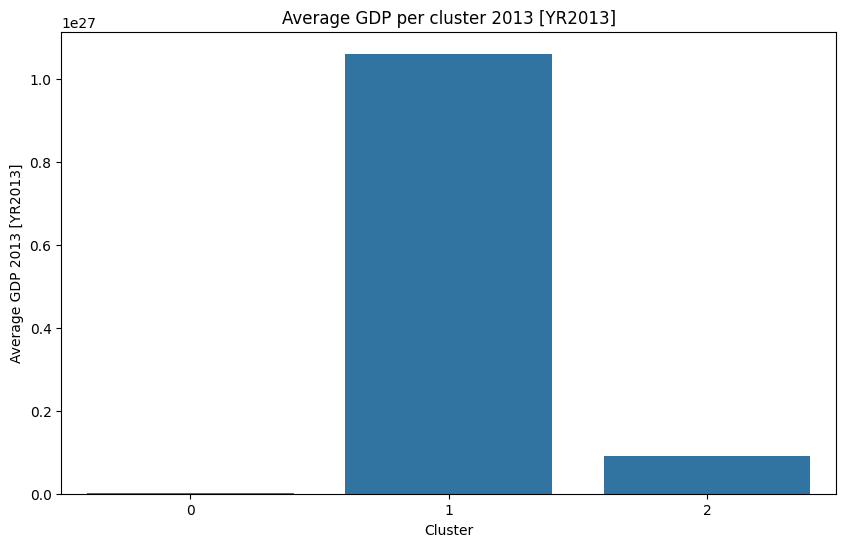

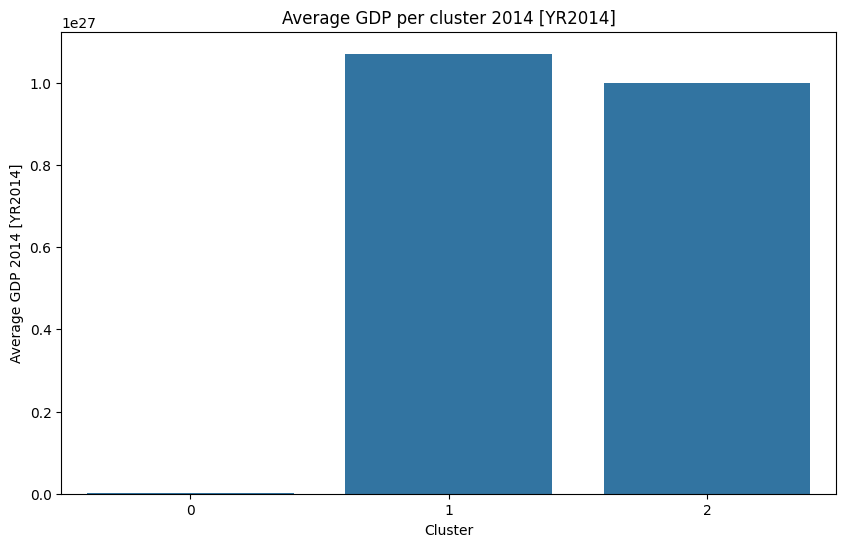

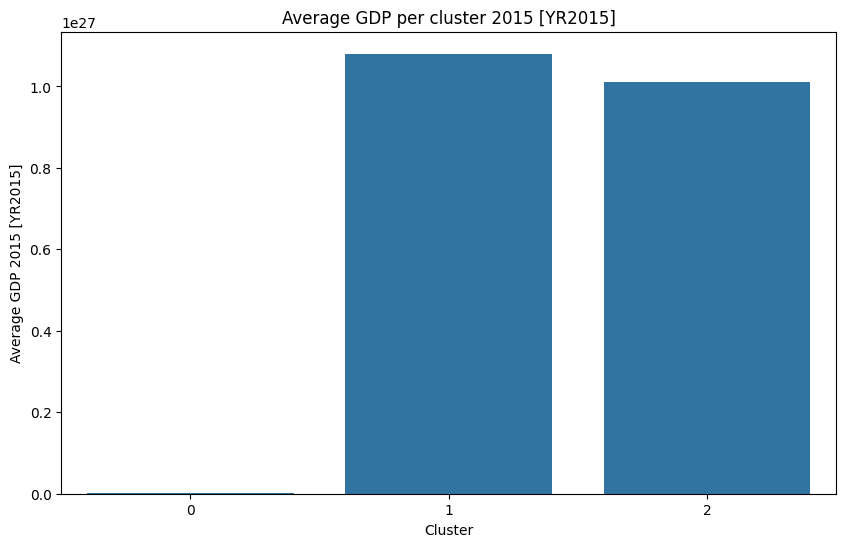

In [82]:
for col in gdp_cluster_summary.columns:
    gdp_cluster_summary[col] = gdp_cluster_summary[col].round(2)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=gdp_cluster_summary.index, y=gdp_cluster_summary[col])
    plt.title(f'Average GDP per cluster {col}')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average GDP {col}')
    plt.show(block = False)

In [83]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00


In [84]:
from sklearn_extra.cluster import KMedoids

In [85]:
kmedoids = KMedoids(n_clusters= 3, random_state=42)
kmedoids.fit(gdp_scaled)

KMedoids(n_clusters=3, random_state=42)

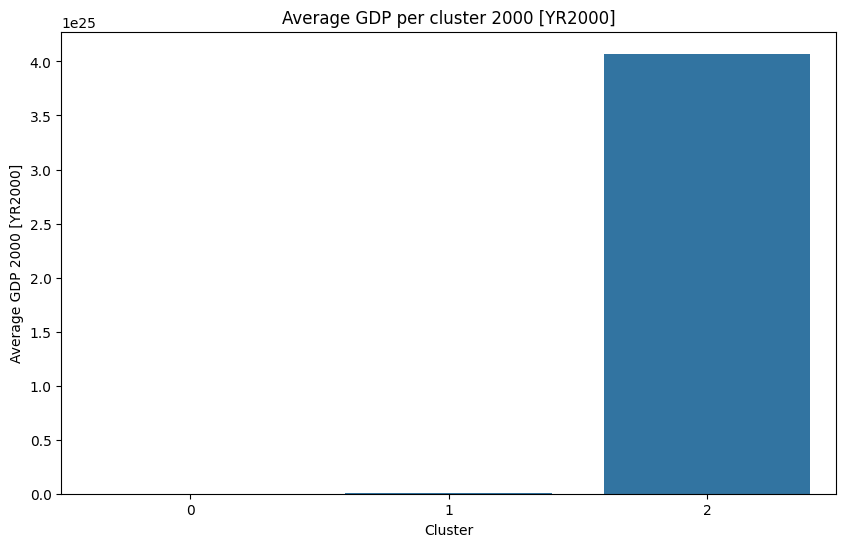

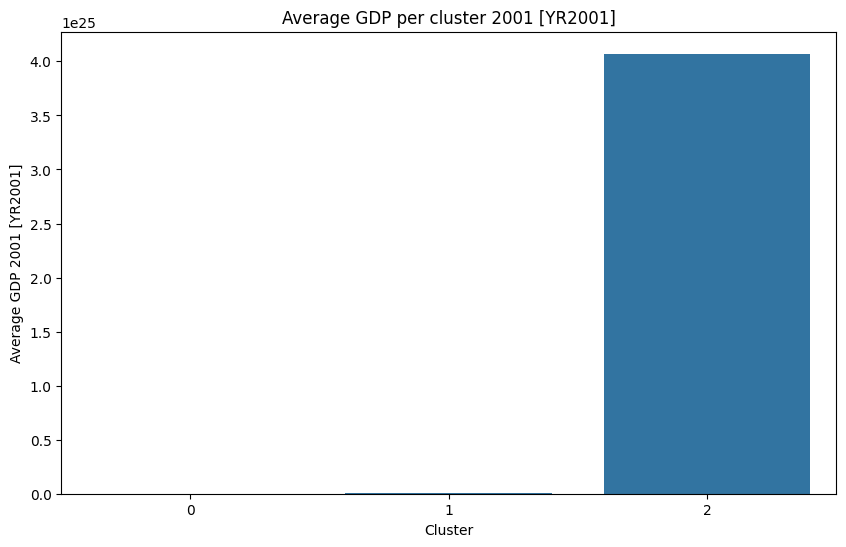

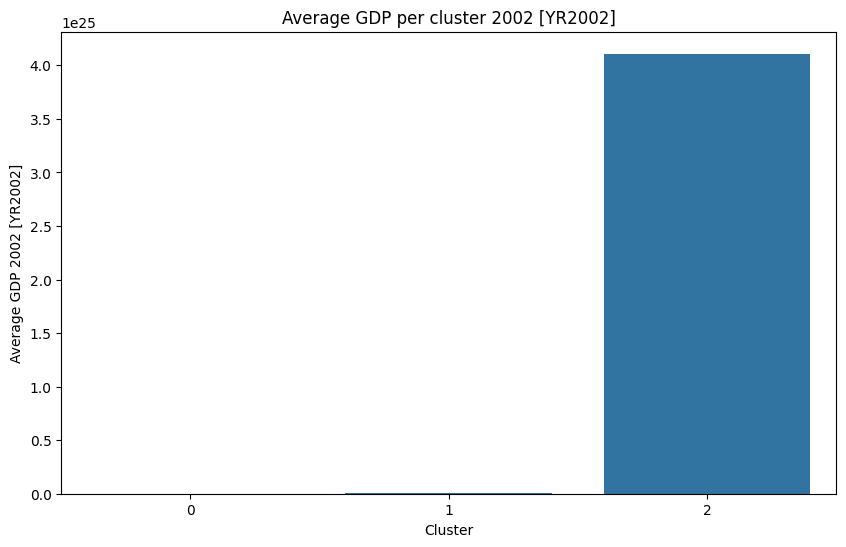

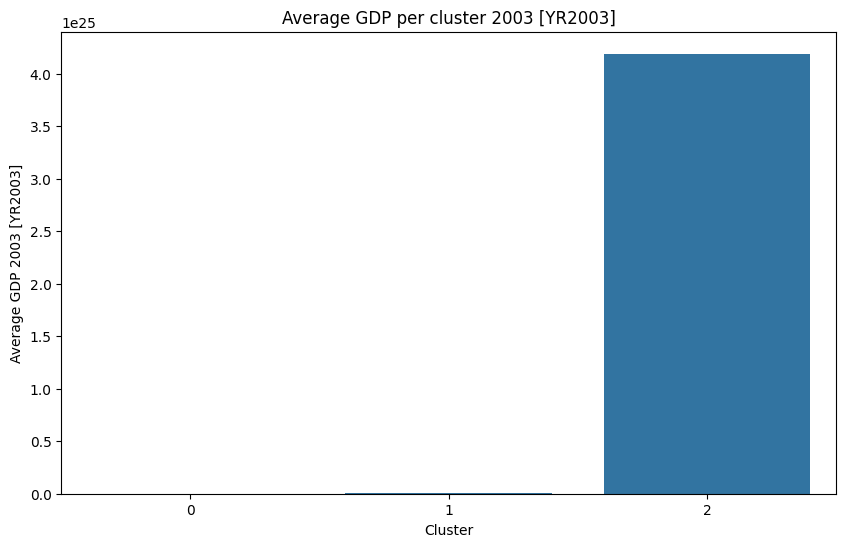

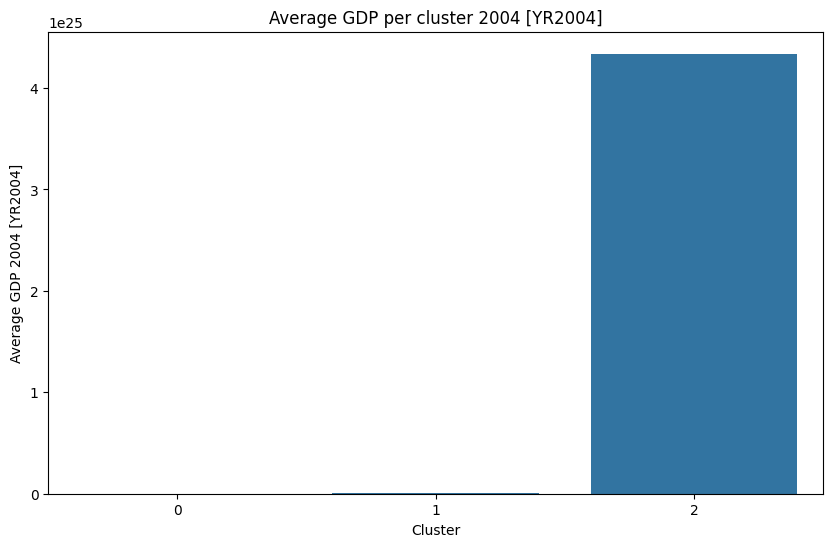

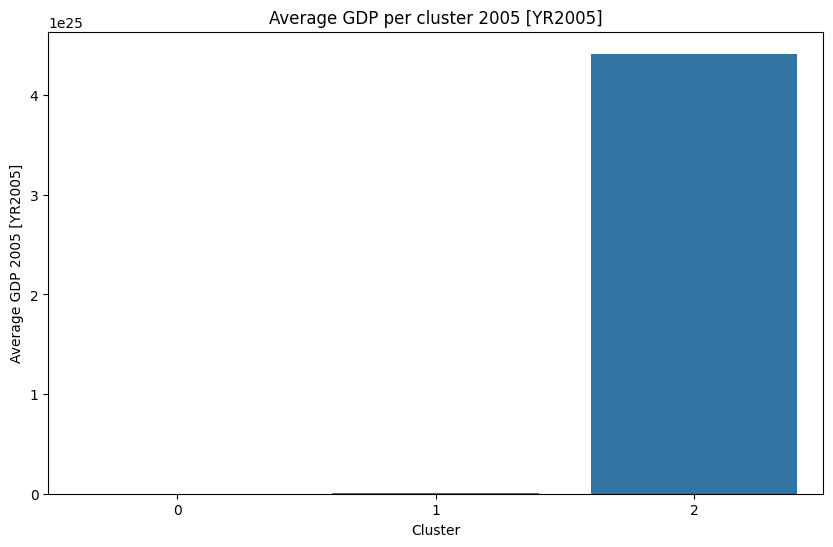

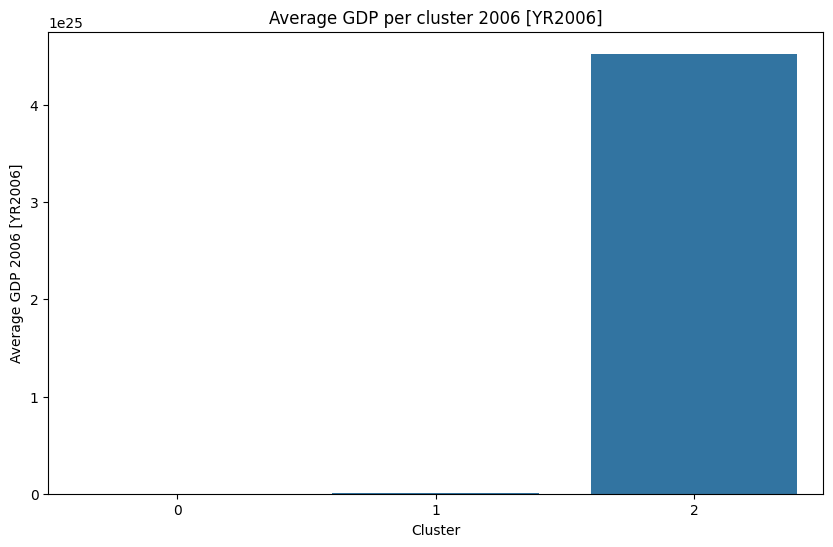

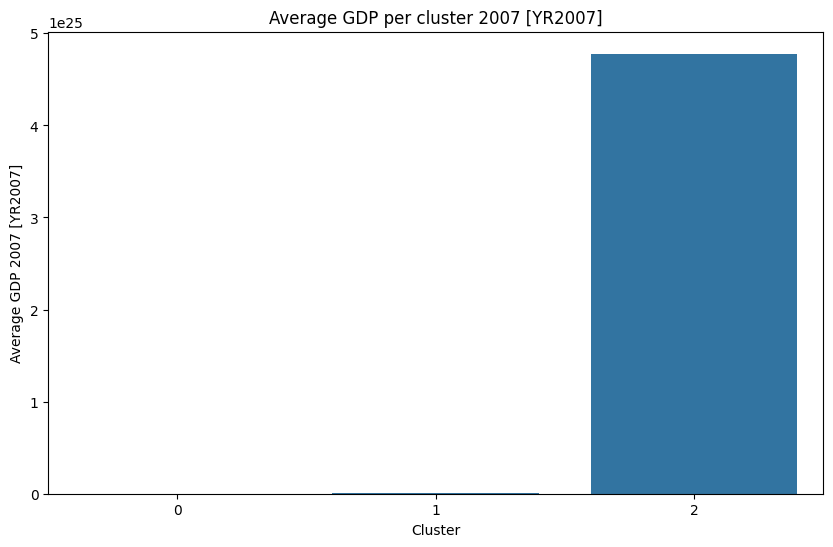

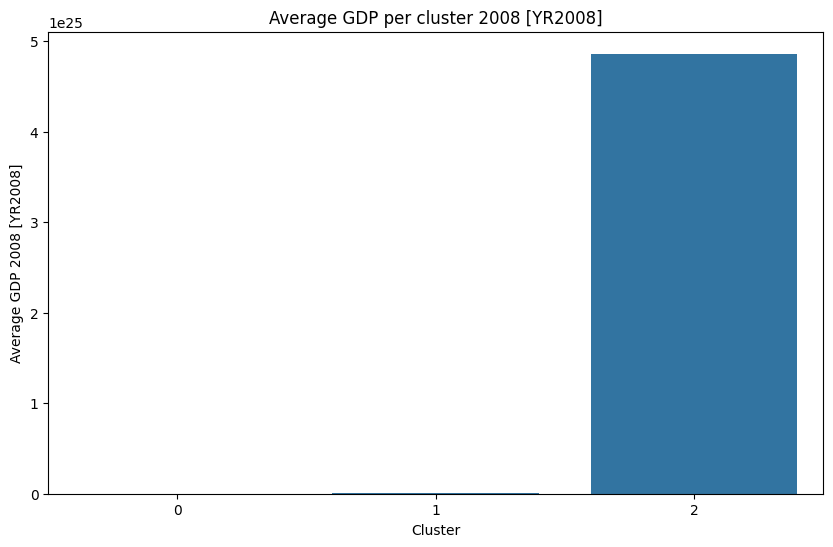

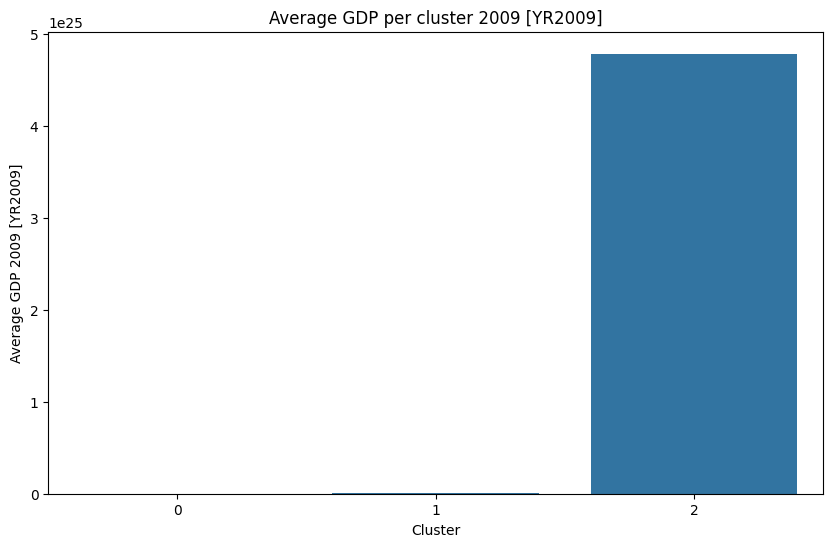

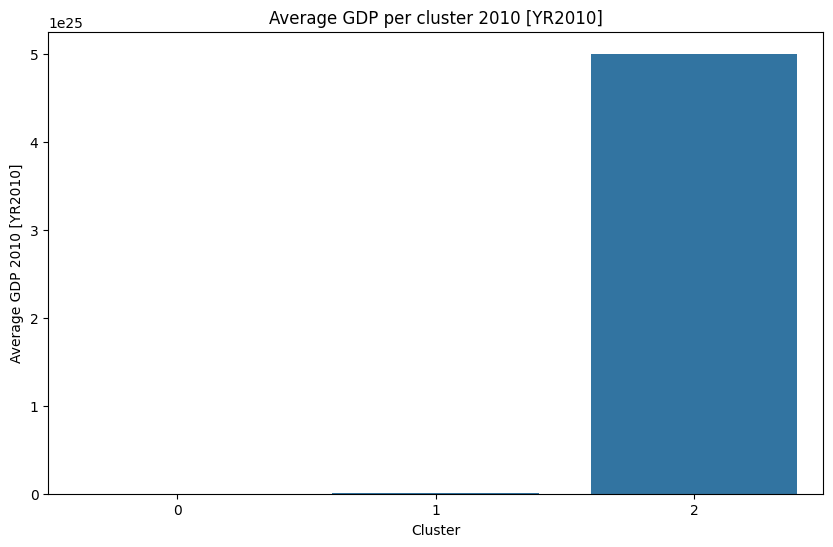

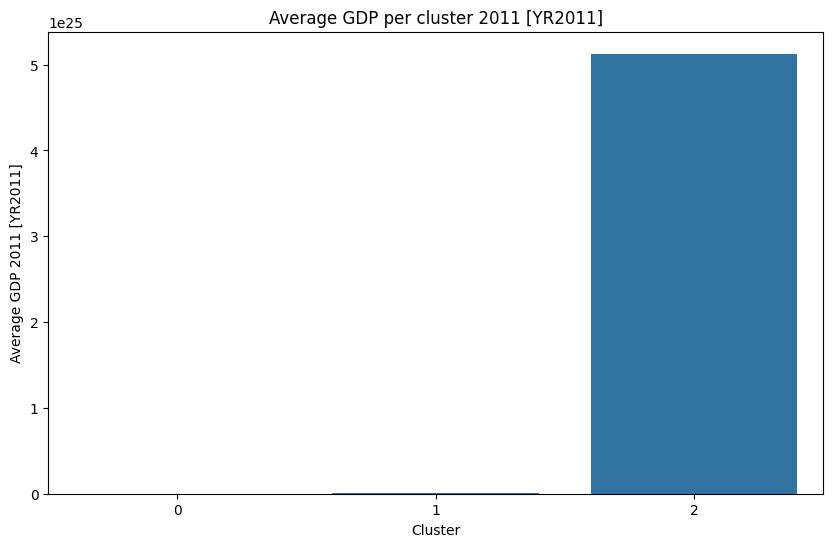

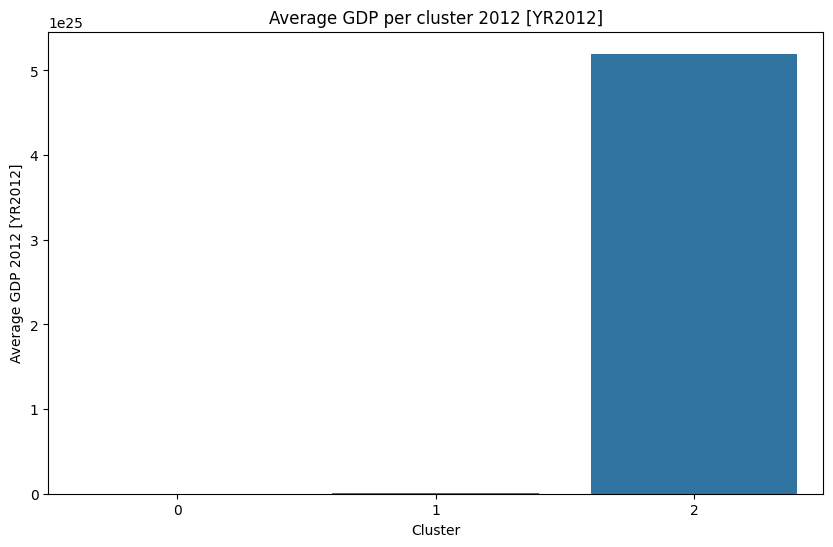

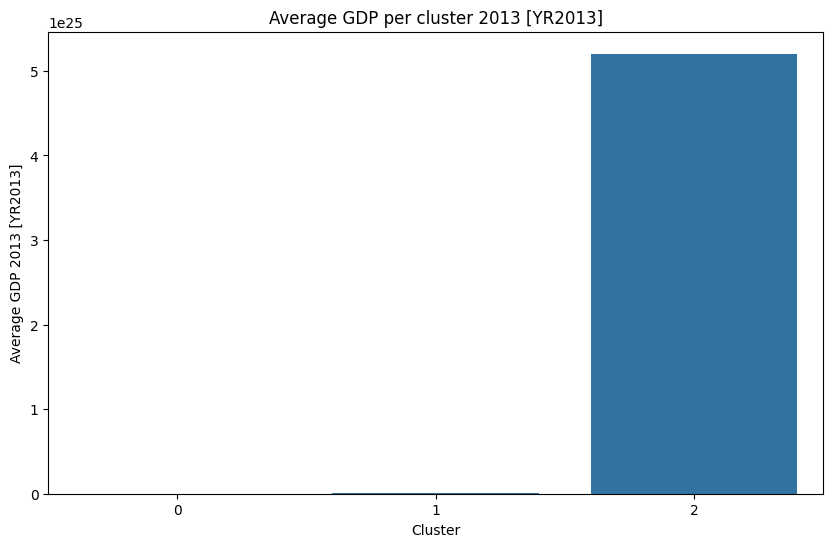

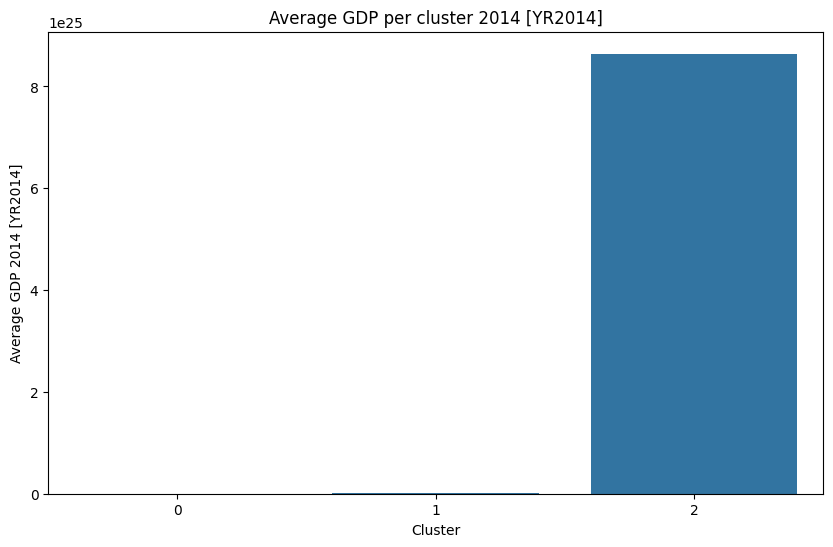

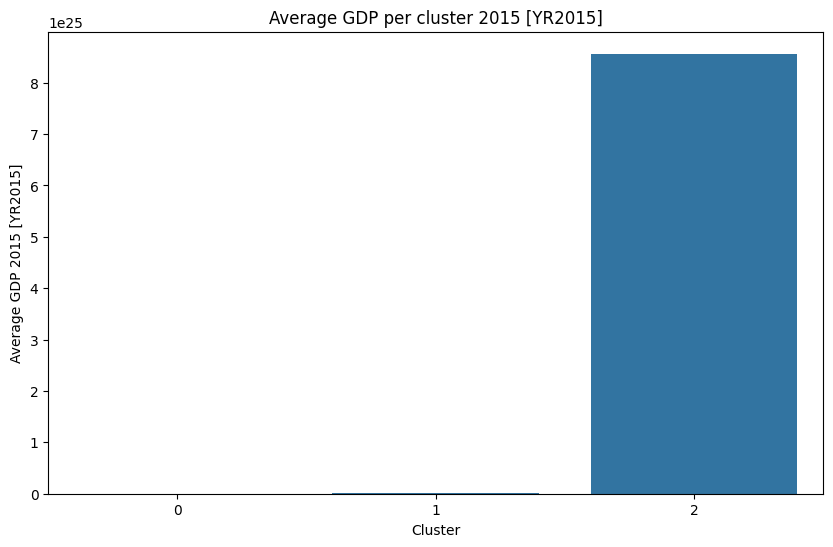

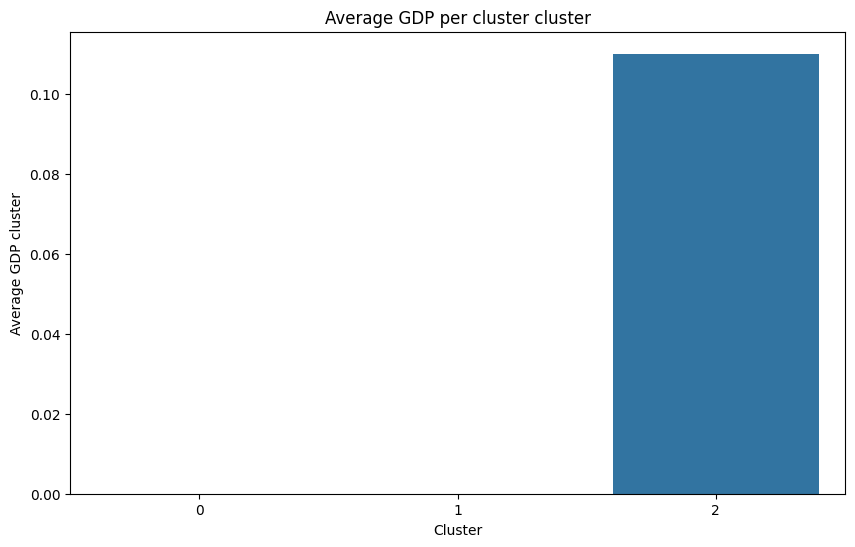

In [86]:
gdp_data['kmedoids_cluster'] = kmedoids.labels_
gdp_kmedoids_cluster_summary = gdp_data.groupby('kmedoids_cluster').mean()
gdp_kmedoids_cluster_summary
for col in gdp_kmedoids_cluster_summary.columns:
    gdp_kmedoids_cluster_summary[col] = gdp_kmedoids_cluster_summary[col].round(2)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=gdp_kmedoids_cluster_summary.index, y=gdp_kmedoids_cluster_summary[col])
    plt.title(f'Average GDP per cluster {col}')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average GDP {col}')
    plt.show(block = False)

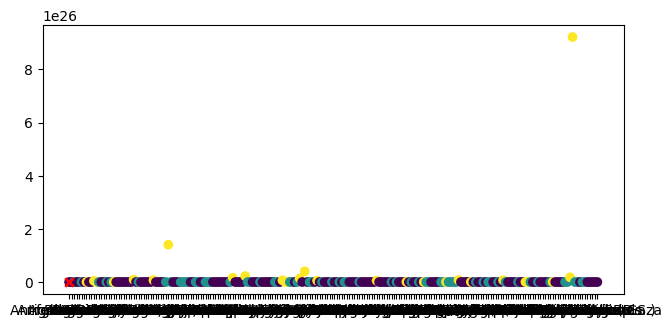

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 3.5))
# Assuming 'gdp_data' has a column named 'Year' or a similar index
# that represents the x-axis values:
x_values = gdp_data.index  # or gdp_data['Year'] if you have a 'Year' column

# Use x_values and the mean for scatter plot
plt.scatter(x_values, gdp_data.mean(axis=1), c=kmedoids.labels_, cmap='viridis')

plt.scatter(kmedoids.cluster_centers_[:, 0],
            kmedoids.cluster_centers_[:, 1], marker='x', color='red')
plt.show()

In [92]:
!!pip install --upgrade pyclustering

['Requirement already satisfied: pyclustering in /usr/local/lib/python3.10/dist-packages (0.10.1.2)',
 'Requirement already satisfied: scipy>=1.1.0 in /usr/local/lib/python3.10/dist-packages (from pyclustering) (1.13.1)',
 'Requirement already satisfied: matplotlib>=3.0.0 in /usr/local/lib/python3.10/dist-packages (from pyclustering) (3.8.0)',
 'Requirement already satisfied: numpy>=1.15.2 in /usr/local/lib/python3.10/dist-packages (from pyclustering) (1.26.4)',
 'Requirement already satisfied: Pillow>=5.2.0 in /usr/local/lib/python3.10/dist-packages (from pyclustering) (11.0.0)',
 'Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.0.0->pyclustering) (1.3.1)',
 'Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.0.0->pyclustering) (0.12.1)',
 'Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=3.0.0->pyclustering

In [93]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedians import kmedians
from pandas import crosstab
import warnings
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.datasets import make_blobs

In [94]:
# Updated section of the pyclustering.cluster.center_initializer.py file.
class kmeans_plusplus_initializer:
    # ... rest of the class ...
        def __calculate_shortest_distances(self, data, centers):
            """!
            @brief Calculates the shortest distance to the closest center for each point of the data.

            @param[in] data (list): Input data that is presented as list of points (objects), each point should be represented by list or tuple.
            @param[in] centers (list): Already allocated centers.

            @return (list) List of shortest distances to the closest centers for each point of the data.
            """

            dataset_differences = np.zeros((len(centers), len(data)))
            for index_center in range(len(centers)):
                center = data[centers[index_center]]
                diff = data - center[np.newaxis, :]
                distances = np.sum(diff * diff, axis=1)
                dataset_differences[index_center] = distances

            # ignore warning related to numpy calculation (occurs when distance between some objects is not possible to calculate)
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=RuntimeWarning) # Instead of numpy.warnings, use warnings.simplefilter.
                shortest_distances = np.nanmin(dataset_differences, axis=0)

            return shortest_distances

In [95]:
# Initialize initial medians using kmeans++ initializer
initial_medians = kmeans_plusplus_initializer(gdp_scaled, 4).initialize()

# Create K-Median instance
kmedian_instance = kmedians(gdp_scaled, initial_medians)

# Perform clustering
kmedian_instance.process()

# Get clusters and final medians
clusters = kmedian_instance.get_clusters()
final_medians = kmedian_instance.get_medians()

# Visualize the clusters
colors = ['r', 'g', 'b', 'c']

plt.figure(figsize=(10, 6))
for cluster_idx, cluster in enumerate(clusters):
    cluster_data = gdp_scaled[cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_idx], label=f'Cluster {cluster_idx}')

# Plot the medians
final_medians = np.array(final_medians)
plt.scatter(final_medians[:, 0], final_medians[:, 1], c='yellow', marker='X', s=200, label='Medians')
plt.title('K-Median Clustering')
plt.legend()
plt.show()


TypeError: kmeans_plusplus_initializer() takes no arguments

In [90]:
kmedians_instance = kmedians(gdp_scaled,initial_cluster_centers)
kmedians_instance.process();

clusters = kmedians_instance.get_clusters()
y_kmedians = np.zeros([X.shape[0]])
y_kmedians[clusters[0]]=0
y_kmedians[clusters[1]]=1

C = np.array(kmedians_instance.get_medians())
ax = plt.axes()
ax.grid(visible=True, zorder=1)
ax.scatter(C[:,0],C[:,1],marker='+',c='red',zorder=4);

for i in range(K):
    idx = np.where(y_kmedians==i)
    ax.scatter(X[idx,0],X[idx,1],marker='.',zorder=3,c=cor[i])

plt.axis('equal');
crosstab(y,y_kmedians)

NameError: name 'X' is not defined